# FBB you MUST label, give titles, and decribe with captions your figure to show that you are understanding what you are doing. If this was your midterm you would have lost points in all sections because of this!

# Tell what you are plotting **and what it means**

# I did not see any comments about inequality of income in the notebook till the last question. You should have commented what the slope of the lines being less than 1 mean right away. 

# Your conclusions about the ethinicity are wrong. 

# The coding parts are ok and give you the results that you should get. but tell in each cell what you are doing with a comment.

# there are lots of outputs without explenations. There should be NONE: all outputs should be discussed

In [74]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
import statsmodels.api as sm

import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


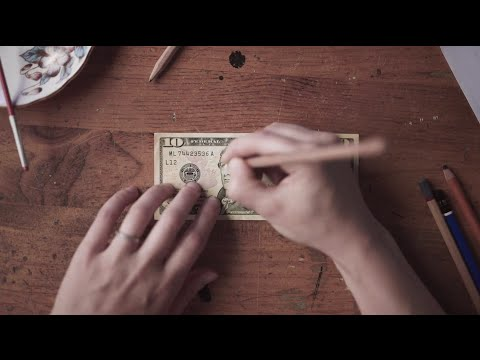

In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [3]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [ ]:
# FBB while hard coding each link is correct and it works, see my solution for how to do it automatically in a loop

In [15]:
allmales = {}
allmales['all'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls", header = 9, skiprows=(0-9))
## FBB Do not exceed the length of the cell with your code
allmales['white'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls", header = 9, 
                                  skiprows=(0-9))
## FBB Do not exceed the length of the cell with your code
allmales['black'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls", header = 9, 
                                  skiprows=(0-9))
## FBB Do not exceed the length of the cell with your code
allmales['asian'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls", header = 9, 
                                  skiprows=(0-9))
## FBB Do not exceed the length of the cell with your code
allmales['hispanic'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls", header = 9, 
                                     skiprows=(0-9))

In [16]:
allfemales = {}
## FBB Do not exceed the length of the cell with your code

allfemales['all'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls", header = 9, 
                                  skiprows=(0-9))
allfemales['white'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls", header = 9, 
                                    skiprows=(0-9))
allfemales['black'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls", header = 9, 
                                    skiprows=(0-9))
allfemales['asian'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls", header = 9, 
                                    skiprows=(0-9))
allfemales['hispanic'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_9.xls", header = 9,
                                       skiprows=(0-9))

In [17]:
type(allmales)

dict

In [18]:
allmales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


In [19]:
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [20]:
# not fully understanding how this is displaying

# FBB:  every key-value pair in the dictionary allfemales and allmales represents 
# an ethnic group and a corresponding dataframe. dataframes have the .describe() property wich takes mean, std, 
# percentiles of the distributions stored in each column. 
# with this for loop I iterate over the ethnic groups and print the mean, std, max etc of the distribution 
# for each income bracket. 
# please ask me if it is still not clear
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### white
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        12310.782609           2214.586957        673.413043   
std         19885.397175           5970.622977        776.907047   
min            76.000000              0.000000          4.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         74382.000000          30286.000000       2583.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         781.195652        971.630435         1036.956522   
std         1023.663283       1566.965750         1730.981173   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN         

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# Figure 1

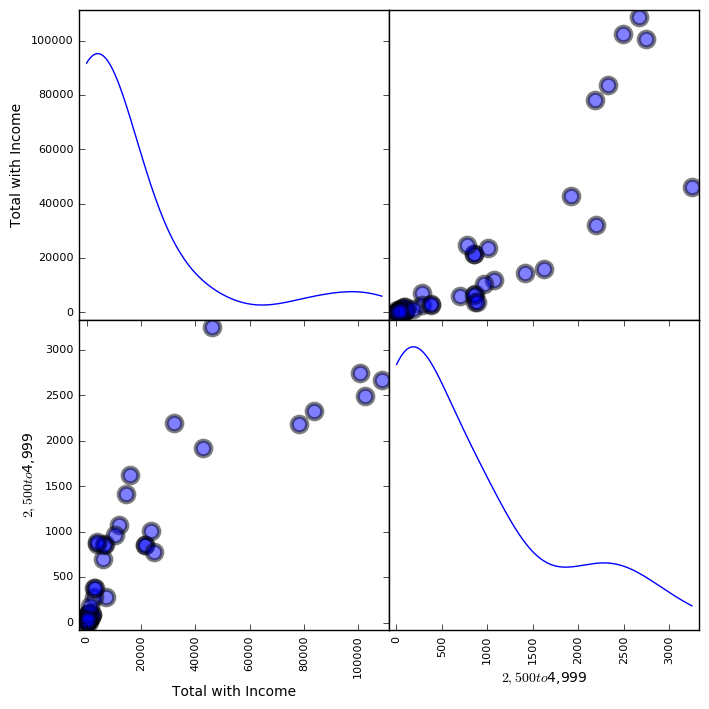

In [23]:
# made it a little smaller than your example
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(8,8), 
                        diagonal='kde')   

# FBB MISSING CAPTION each figure needs to have a caption!

In [24]:
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [27]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

# Figure 2

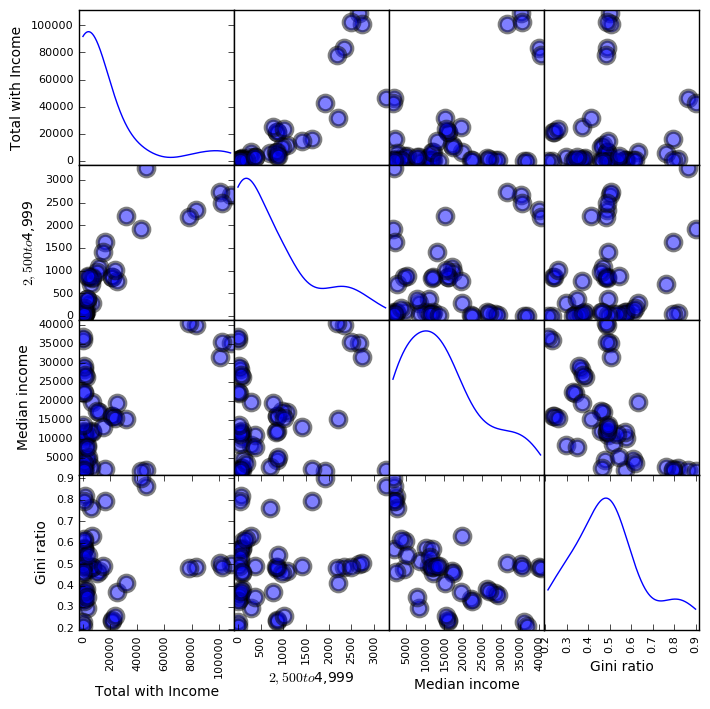

In [28]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(8,8), 
                        diagonal='kde')

# FBB this is my description: you should instead write your own caption for each figure. 

## The above plot shows the relationships between each of four variables.
## For example, median income and total with income appear to be positively correlated.
## In the cells where a variable intersects itself, scatter_matrix shows the distribution function of that variable.

# Figure 3

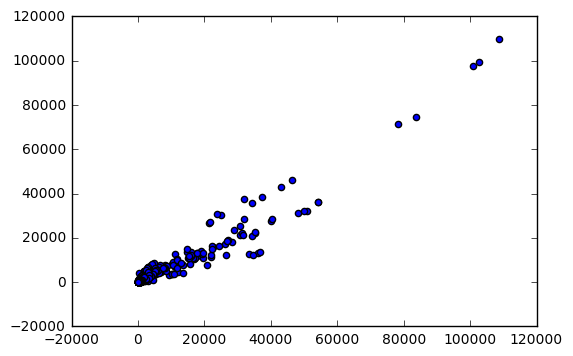

In [29]:
pl.scatter(allmales['all'], allfemales['all'])

# FBB MISSING CAPTION each figure needs to have a caption!

In [32]:
male_incomes = []
male_incomes.append(allmales['white']['Median income'][1])
male_incomes.append(allmales['black']['Median income'][1])
male_incomes.append(allmales['hispanic']['Median income'][1])
male_incomes.append(allmales['asian']['Median income'][1])
male_incomes

[40122.0, 24855.0, 25411.0, 40153.0]

In [33]:
female_incomes = []
female_incomes.append(allfemales['white']['Median income'][1])
female_incomes.append(allfemales['black']['Median income'][1])
female_incomes.append(allfemales['hispanic']['Median income'][1])
female_incomes.append(allfemales['asian']['Median income'][1])
female_incomes

[23780.0, 20044.0, 17762.0, 24840.0]

# FBB You should remove this line which I printed to help you out or show what it means. There should be no number in your notebook outputs that are not explained

# Figure 4

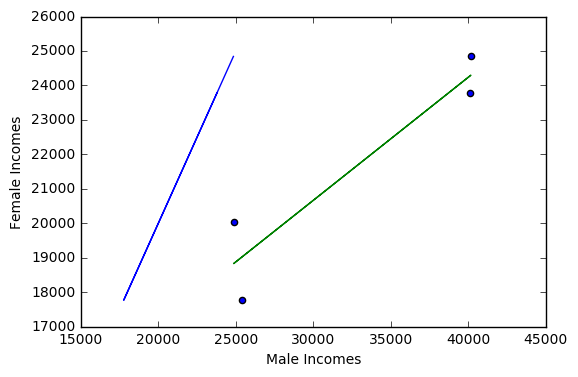

In [52]:
pl.scatter(male_incomes, female_incomes, marker="o")
pl.xlabel('Male Incomes')
pl.ylabel('Female Incomes')

# this shows the line for x=y, or if incomes were the same for men and women
pl.plot(female_incomes, female_incomes)

pl.plot(male_incomes, np.poly1d(np.polyfit(male_incomes, female_incomes, 1))(male_incomes))
?np.poly1d

# FBB MISSING CAPTION each figure needs to have a caption!

In [53]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.360976045471, 0.5739482903542108)

# FBB You should remove this line which I printed to help you out or show what it means. There should be no number in your notebook outputs that are not explained

# Figure 5

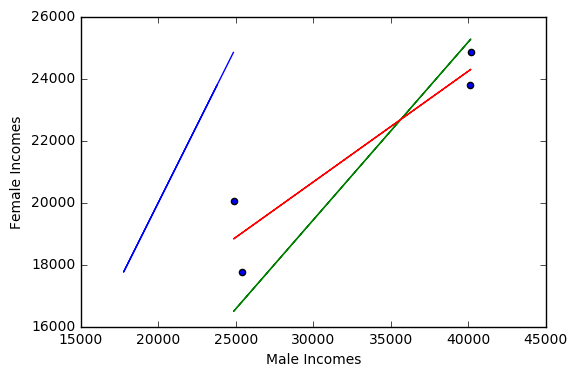

In [95]:
# y = beta0 + beta1 * x
pl.scatter(male_incomes, female_incomes, marker="o")
pl.xlabel('Male Incomes')
pl.ylabel('Female Incomes')

pl.plot(female_incomes, female_incomes) #blue
# analytical solution for OLS
pl.plot(np.array(male_incomes), beta1*np.array(male_incomes) + beta0) #green
# numpy statsmodels line fit
pl.plot(male_incomes, np.poly1d(np.polyfit(male_incomes, female_incomes, 1))(male_incomes)) #red

# FBB MISSING CAPTION each figure needs to have a caption! If I see this in the midterm I skip right over. plots without captions, legends, titles (Figure 3 is not a title) are meaningless. If you can make but not interpret the plot I cannot give you points and I do not know if you can interpret these figures, so I have no idea if you know what you are doing.

In [66]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result is the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

# Figure 6

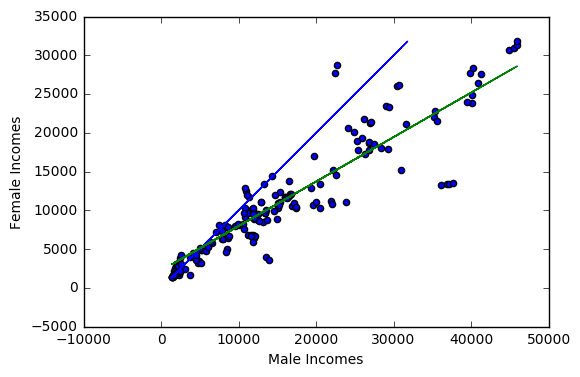

In [96]:
pl.scatter(all_males_allincomes, all_females_allincomes, marker="o")
pl.xlabel('Male Incomes')
pl.ylabel('Female Incomes')

# x = y
pl.plot(all_females_allincomes, all_females_allincomes) #blue

# analytical solution for OLS
pl.plot(np.array(all_males_allincomes), beta1*np.array(all_males_allincomes) + beta0) #green

## Comparing regressions: this (green) line is similar to the one plotted using the median total incomes; the two regression lines (three including red numpy above) sit at similar angles to the blue x=y line, though the total median income OLS line seems to have a steeper slope than the OLS line for all median incomes plotted in the second figure
 
 
# FBB you ahve not described the lines. I do not know what "this" line is or how it is generated. I am yet to see any comments that state that we are seeing inequality in income. 

# why are you talking about what slope the regressions **seem** to have? you can get those numbers from your 

# samplemalestipend = 42500

statsmodels.api?

In [85]:
# y,x
model = sm.OLS(all_females_allincomes[mask], all_males_allincomes[mask])

In [88]:
modelfit = model.fit()

In [91]:
modelfit.predict(samplemalestipend)[0].astype(int)

28535

## A woman doing a job that man earns 42,500 dollars to do can expect to earn 28,535 dollars.

## You can assess gender equality by race by comparing the distance between the dots and the blue line in figures 4-6. Although I haven't yet labeled each individual race dot in figures 4 and 5, it appears that one race is kind of close to equal, one a little bit less so, and two are far from equal.

# FBB NO: the fact that different ethnicities earn different income (covariance in the data) makes the line fit unreliable. See the discussion in the HW solution.